Data preview:
     Price
0  20.000
1  20.000
2  20.000
3  20.000
4  19.834
Number of rows: 10


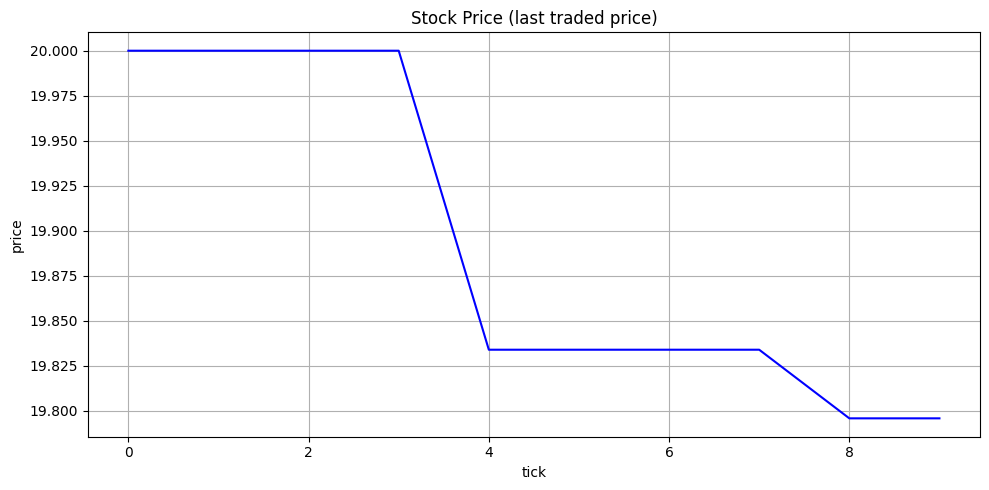

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV without a header
df = pd.read_csv("../build/Debug/marketData.csv", header=None, names=["Price"])

# Plot the prices over their index
plt.figure(figsize=(10, 5))
plt.plot(df.index, df["Price"], linestyle='-', color='blue')

print("Data preview:\n", df.head())
print("Number of rows:", len(df))



plt.title("Stock Price (last traded price)")
plt.ylabel("price")
plt.xlabel("tick")
plt.grid(True)

plt.tight_layout()
plt.show()
plt.show()

In [ ]:
import pandas as pd
import plotly.graph_objects as go

df = pd.read_csv('../build/Debug/ohcvl.csv', header=None, names=['open', 'high', 'low', 'close', 'volume'])
df['index'] = df.index

fig = go.Figure(data=[go.Candlestick(
    x=df['index'],
    open=df['open'],
    high=df['high'],
    low=df['low'],
    close=df['close'],
    increasing_line_color='green',
    decreasing_line_color='red'
)])

fig.update_layout(
    title='Candlestick Chart',
    xaxis_title='Index',
    yaxis_title='Price',
    xaxis_rangeslider_visible=False
)

fig.show()
